In [11]:
#!/usr/bin/env python

In [12]:
import wuml
import numpy as np
import torch
import wplotlib

Splits the data into training and test

In [20]:
data = wuml.wData(xpath='../../data/regress.csv', ypath='../../data/regress_label.csv', batch_size=20, label_type='continuous')
[X_train, X_test, y_train, y_test] = wuml.split_training_test(data, data_name='regress', data_path='../../data/', xdata_type="%.4f", ydata_type="%.4f", test_percentage=0.2)

In [14]:
def costFunction(x, y, ŷ, ind):
	ŷ = torch.squeeze(ŷ)
	return torch.sum((y- ŷ) ** 2)	

In [15]:
data_train = wuml.wData(xpath='../../data/regress_train.csv', ypath='../../data/regress_train_label.csv', batch_size=20, label_type='continuous')
data_test = wuml.wData(xpath='../../data/regress_test.csv', ypath='../../data/regress_test_label.csv', batch_size=20, label_type='continuous')

In [16]:
bNet = wuml.basicNetwork(costFunction, data_train, networkStructure=[(100,'relu'),(100,'relu'),(1,'none')], max_epoch=500, learning_rate=0.001)
bNet.train(print_status=False)

In [17]:
Ŷ_train = bNet(data_train, output_type='ndarray')		#Takes Numpy array or Tensor as input and outputs a Tensor
Ŷ_test = bNet(data_test, output_type='ndarray')		#Takes Numpy array or Tensor as input and outputs a Tensor

In [18]:
newX = np.expand_dims(np.arange(0,5,0.1),1)
Ŷ_line = bNet(newX, output_type='ndarray')		#Takes Numpy array or Tensor as input and outputs a Tensor

plot the results out<br>
If show is false, the next plot will superimpose on the current one

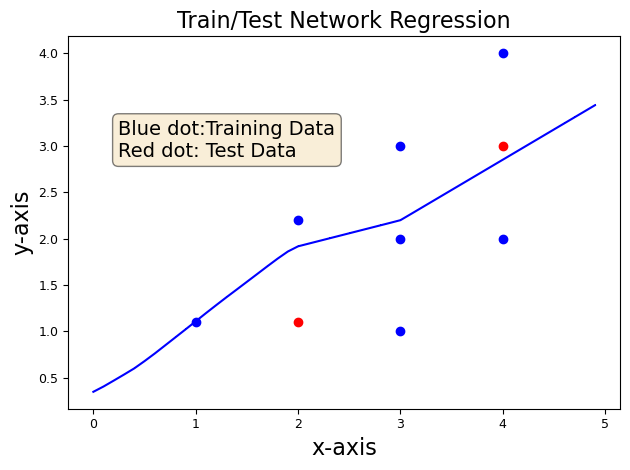

In [19]:
wplotlib.scatter(data_train.X, data_train.Y, marker='o', color='blue', show=False)	
wplotlib.scatter(data_test.X, data_test.Y, marker='o', color='red', show=False)
wplotlib.lines(newX, Ŷ_line, title='Train/Test Network Regression', xlabel='x-axis', ylabel='y-axis', 
				imgText='Blue dot:Training Data\nRed dot: Test Data')